# A quick example of the risk-reward trade off that DOL captures.

First a couple of set up things:


In [1]:
# these are just to tell python what parts of it we want to use:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# and this sets the width of the window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Now lets collect some data:
1. What data do we need?
    - __SALES DATA__
2. Where could we get this data from?
    - Emma's records
    - Ask the vendor
    - other renters
    - simulate data ourselves

In [2]:
np.random.seed(10)

In [3]:
size=52*3 # three years of weekly data 

In [5]:
rel_range = range(0,100)

In [10]:
volume = np.random.choice(rel_range, size=size)

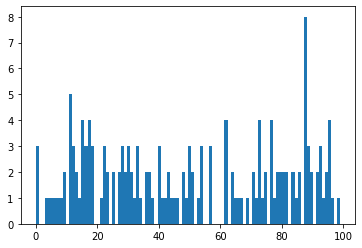

In [12]:
p=plt.hist(volume, bins = len(rel_range))

In [15]:
# revenue
R_u = 200
R = volume * R_u

In [17]:
CM_u = [80,50,30] # [] indicates that this is a list

In [20]:
CM_u[0]

80

In [23]:
CM1 = volume * CM_u[0]
CM2 = volume * CM_u[1]
CM3 = volume * CM_u[2]

In [25]:
FC = [2000,800,0]

In [29]:
OI1 = CM1 - FC[0]
OI2 = CM2 - FC[1]
OI3 = CM3 - FC[2]

In [30]:
# put the volumes and oi's into a frame
col_dict =  {
            "volume":volume, 
            "OI1":OI1,
            "OI2":OI2,
            "OI3":OI3,
            }
OI_data = pd.DataFrame(col_dict, columns=list(col_dict.keys()))

In [36]:
OI_data.describe()

,volume,OI1,OI2,OI3
count,156.000000,156.000000,156.000000,156.000000
mean,50.032051,2002.564103,1701.602564,1500.961538
std,30.164799,2413.183915,1508.239947,904.943968
min,0.000000,-2000.000000,-800.000000,0.000000
25%,22.000000,-240.000000,300.000000,660.000000
50%,48.500000,1880.000000,1625.000000,1455.000000
75%,79.000000,4320.000000,3150.000000,2370.000000
max,99.000000,5920.000000,4150.000000,2970.000000


In [45]:
# slice the dataframe and get its length
len(OI_data[OI_data['OI1']<0])

42

In [46]:
loss = [
    len(OI_data[OI_data['OI1']<0]),
    len(OI_data[OI_data['OI2']<0]),
    len(OI_data[OI_data['OI3']<0])
]

In [47]:
loss

[42, 26, 0]

In [48]:
prLoss = [x/size for x in loss]

In [49]:
prLoss

[0.2692307692307692, 0.16666666666666666, 0.0]

In [50]:
OI_data

,volume,OI1,OI2,OI3
0,9,-1280,-350,270
1,15,-800,-50,450
2,64,3120,2400,1920
3,28,240,600,840
4,89,5120,3650,2670
...,...,...,...,...
151,96,5680,4000,2880
152,73,3840,2850,2190
153,40,1200,1200,1200
154,43,1440,1350,1290


# Now lets plot the data:

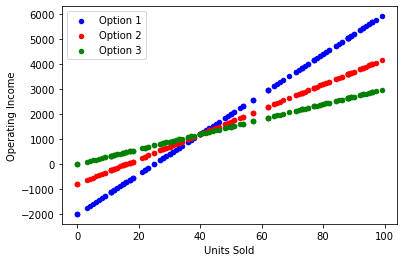

In [51]:
ax = OI_data.plot(kind="scatter", x="volume",y="OI1", color="b", label="Option 1")
OI_data.plot(kind="scatter", x="volume",y="OI2", color="r", label="Option 2", ax=ax)
OI_data.plot(kind="scatter", x="volume",y="OI3", color="g", label="Option 3", ax=ax)

ax.set_xlabel("Units Sold")
ax.set_ylabel("Operating Income")
plt.show()

<AxesSubplot:ylabel='Frequency'>

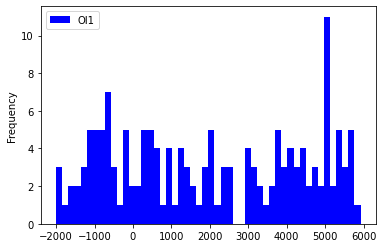

In [55]:
OI_data[['OI1']].plot(kind='hist',color='b', bins=50)

<AxesSubplot:ylabel='Frequency'>

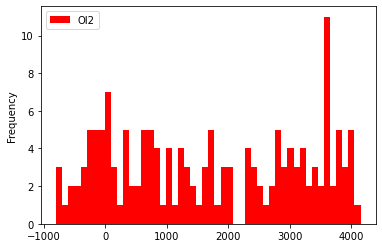

In [57]:
OI_data[['OI2']].plot(kind='hist',color='r', bins=50)

<AxesSubplot:ylabel='Frequency'>

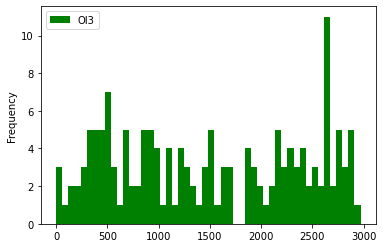

In [58]:
OI_data[['OI3']].plot(kind='hist',color='g', bins=50)

<AxesSubplot:ylabel='Frequency'>

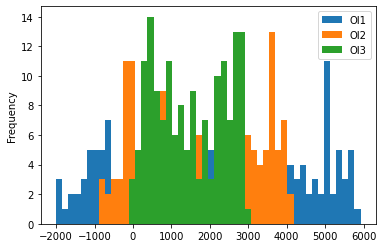

In [59]:
OI_data[['OI1','OI2','OI3']].plot(kind='hist', bins=50)